In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:
ALL_CSV_PATH = [
    "/workspace/plane-nerf/outputs/jackal_floor_training_data_1/plane-nerf-fast/2024-03-15_135211/eval_results_2024-03-15_144156.csv",
    "/workspace/plane-nerf/outputs/jackal_floor_training_data_1/plane-nerf-fast/2024-03-18_221148/eval_results_2024-03-18_225408.csv",
    "/workspace/plane-nerf/outputs/jackal_floor_training_data_1/plane-nerf-fast/2024-03-18_154207/eval_results_2024-03-18_162345.csv"
]

In [4]:
all_translation = []
all_rotation = []

for CSV_PATH in ALL_CSV_PATH:
    #Open CSV file as 2d numpy array
    csv_data = np.genfromtxt(CSV_PATH, delimiter=',')
    #If nan values are present, replace them with 0
    csv_data = np.nan_to_num(csv_data)
    iteration = csv_data[:, 0::3]
    translation = csv_data[:, 1::3]
    rotation = csv_data[:, 2::3]
    all_translation.append(translation)
    all_rotation.append(rotation)

all_translation = np.array(all_translation)
all_rotation = np.array(all_rotation)

Final translation error: 0.07451580382726095 m
Final rotation error: 5.364931642347264 degrees
Standard deviation of final translation error: 0.06244301005486733 m
Standard deviation of final rotation error: 4.95890584665173 degrees
[0.455 0.145 0.32  0.065 0.005 0.   ] [0.   0.05 0.1  0.15 0.2  0.25]
[0.465, 0.33, 0.185, 0.02, 0.0, 0.0] [0, 5, 10, 15, 20, 25]
Final translation error: 0.074378232418481 m
Final rotation error: 4.899139415102579 degrees
Standard deviation of final translation error: 0.057212584666006046 m
Standard deviation of final rotation error: 4.911244390111997 degrees
[0.425 0.155 0.335 0.07  0.01  0.005] [0.   0.05 0.1  0.15 0.2  0.25]
[0.51, 0.295, 0.19, 0.005, 0.0, 0.0] [0, 5, 10, 15, 20, 25]
Final translation error: 0.08614710815398681 m
Final rotation error: 4.242948053819809 degrees
Standard deviation of final translation error: 0.08202773683650974 m
Standard deviation of final rotation error: 4.759677081444947 degrees
[0.19  0.535 0.195 0.065 0.01  0.   ] [0

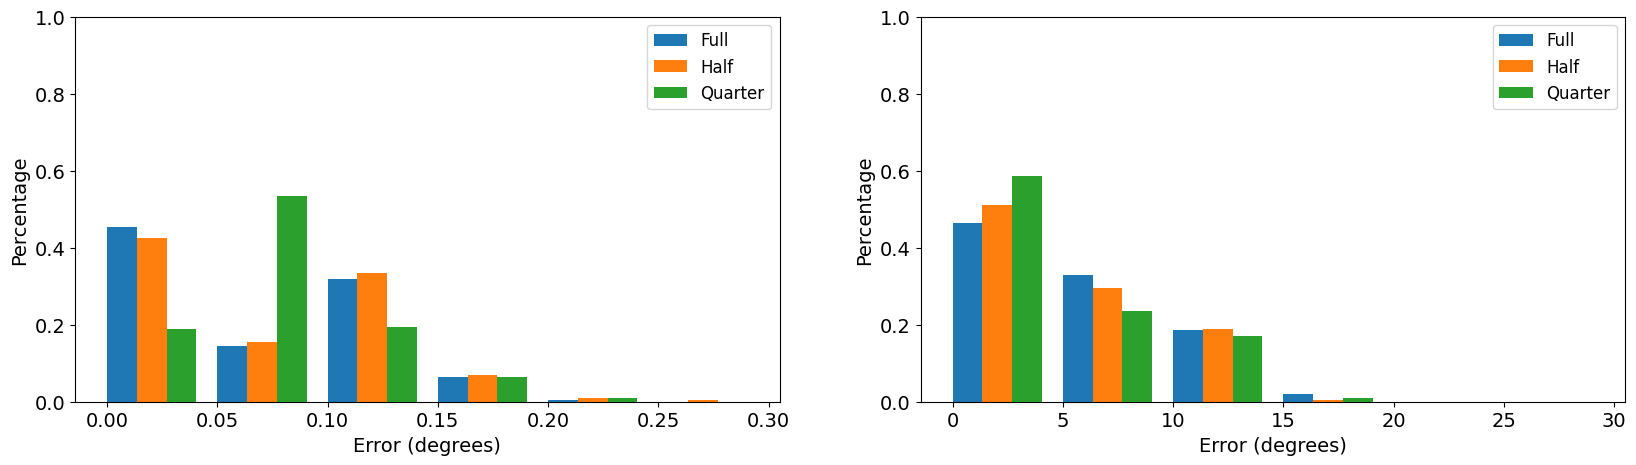

In [5]:
#Plot 3 graphs for PSNR, SSIM, LPIPS side by side
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

#Increase font size
plt.rcParams.update({'font.size': 12})

#Increase font size of axis
for ax in axs:
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
                ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(14) 

graph = 0
for translation, rotation in zip(all_translation, all_rotation):
    final_translation_error = translation[:,-1]
    final_rotation_error = rotation[:,-1]
    print(f"Final translation error: {final_translation_error.mean()} m")
    print(f"Final rotation error: {final_rotation_error.mean() * 180 / math.pi} degrees")

    #Find standard deviation of final translation and rotation error
    print(f"Standard deviation of final translation error: {final_translation_error.std()} m")
    print(f"Standard deviation of final rotation error: {final_rotation_error.std() * 180 / math.pi} degrees")

    #Plot histogram of final translation and rotation error

    bin = []
    percentage = []
    cnt = 6
    for x in range(cnt):
        i = x * 0.05
        bin.append(i)
        percentage.append(len(final_translation_error[(final_translation_error >= i) & (final_translation_error < i+0.05)])/200)

    bin = np.array(bin)
    percentage = np.array(percentage)

    print(percentage,bin)

    bar_width = np.array([0.05] * cnt) * 0.27

    #Draw bar chart side by side
    axs[0].bar(bin+bar_width*graph, percentage, width=bar_width, align="edge")
    axs[0].set_xlabel("Error (degrees)")
    axs[0].set_ylabel("Percentage")
    axs[0].set_ylim(0, 1)

    bin = []
    percentage = []
    cnt = 6
    for x in range(cnt):
        i = x * 5
        bin.append(i)
        percentage.append(len(final_rotation_error[(final_rotation_error/math.pi *180 >= i) & (final_rotation_error/math.pi*180 < i+5)])/200)

    print(percentage,bin)

    bar_width = np.array([5] * cnt) * 0.27

    axs[1].bar(bin+bar_width*graph, percentage, width=bar_width, align="edge")
    axs[1].set_xlabel("Error (degrees)")
    axs[1].set_ylabel("Percentage")
    axs[1].set_ylim(0, 1)

    graph+=1

axs[0].legend(["Full", "Half", "Quarter"])
axs[1].legend(["Full", "Half", "Quarter"])

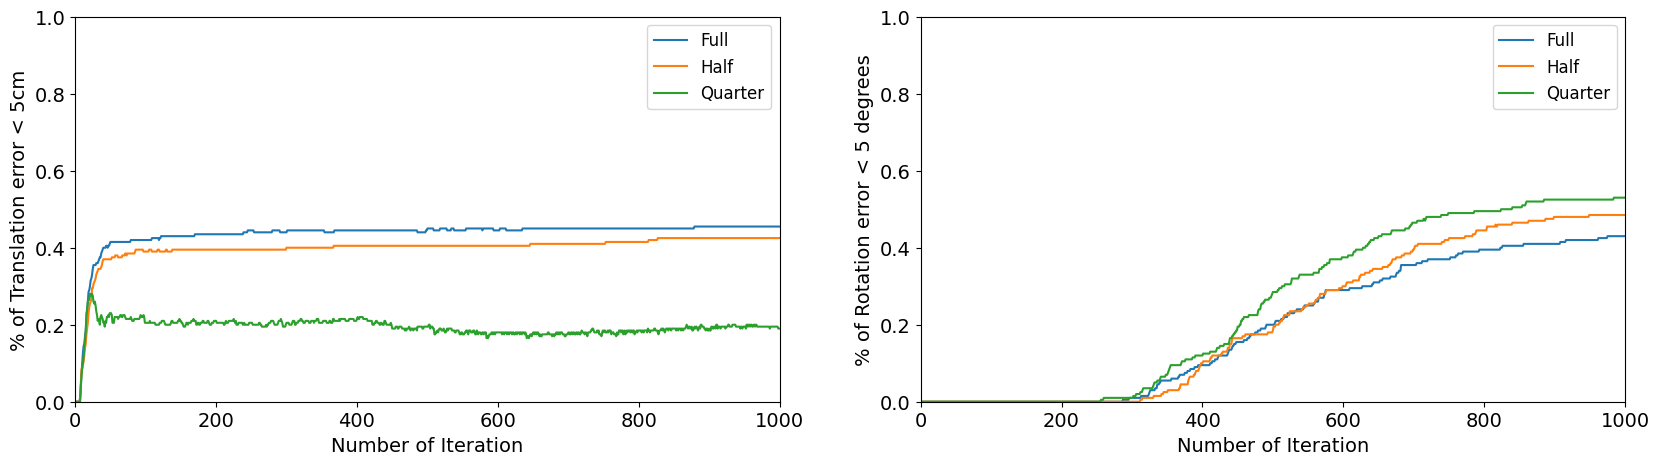

In [6]:
#Plot 3 graphs for PSNR, SSIM, LPIPS side by side
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

#Increase font size
plt.rcParams.update({'font.size': 12})

#Increase font size of axis
for ax in axs:
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
                 ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(14)

for translation, rotation in zip(all_translation, all_rotation):
    #Draw ratio that falls below 5 cm 5 degrees against iteration
    axs[0].plot((translation < 0.05).mean(axis=0))
    axs[0].set_ylabel("% of Translation error < 5cm")
    axs[0].set_xlabel("Number of Iteration")
    axs[0].set_ylim(0, 1)
    axs[0].set_xlim(0,1000)

    axs[1].plot(((rotation < 0.05).mean(axis=0)))
    axs[1].set_ylabel("% of Rotation error < 5 degrees")
    axs[1].set_xlabel("Number of Iteration")
    axs[1].set_ylim(0, 1)
    axs[1].set_xlim(0,1000)
axs[0].legend(["Full", "Half", "Quarter"])
axs[1].legend(["Full", "Half", "Quarter"])